In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [1]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

model_id = (
    # "diffusers/examples/instruct_pix2pix/instruct-pix2pix-model"  # <- replace this
    # "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1735772517"
    # "stablediffusionapi/juggernaut-reborn"
    "dim/nfs_pix2pix_1736384110_step10500"
)
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.bfloat16,
    requires_safety_checker=False,
).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/user-name-goes-here/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [3]:
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionInstructPix2PixPipeline,
    UNet2DConditionModel,
)

input_dir = (
    # "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1735772517/checkpoint-1500"
    # "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1736384110/checkpoint-1500"
    "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1736384110/checkpoint-10500"
)
pipe.unet = UNet2DConditionModel.from_pretrained(
    input_dir,
    subfolder="unet",
    torch_dtype=torch.bfloat16,
).to("cuda")

In [ ]:
# url = "https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/test_pix2pix_4.png"
url = "https://cdn.britannica.com/97/158797-004-E9F0FBE7/North-Cascades-National-Park-Lake-Ann-park.jpg"


def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


image = download_image(url)


prompt = "make nfs 2005 photorealistic"
num_inference_steps = 20
image_guidance_scale = 1.5
guidance_scale = 7

edited_image = pipe(
    prompt,
    image=image,
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
from matplotlib import pyplot as plt

plt.imshow(edited_image, interpolation="nearest")
plt.show()

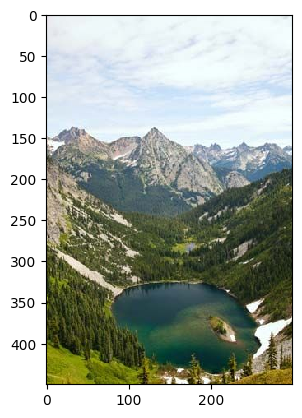

In [3]:
plt.imshow(image, interpolation="nearest")
plt.show()

### Try on nfs

In [5]:
[1, 2, 3, 4, 5, 6][-10:]

[1, 2, 3, 4, 5, 6]

In [2]:
from datasets import load_dataset

dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
# dataset_name = "dim/nfs_pix2pix_1920_1080_v6"
dataset = load_dataset(dataset_name, num_proc=4)
dataset = dataset["train"]

In [9]:
new_dataset = dataset.train_test_split(test_size=10, shuffle=True, seed=42)
new_dataset

DatasetDict({
    train: Dataset({
        features: ['input_image', 'edit_prompt', 'edited_image'],
        num_rows: 842
    })
    test: Dataset({
        features: ['input_image', 'edit_prompt', 'edited_image'],
        num_rows: 10
    })
})

In [13]:
new_dataset['test'][0]['input_image']
None

In [ ]:
dataset[0]["input_image"]

In [ ]:
old_scheduler = pipe.scheduler


In [67]:
from diffusers import AutoPipelineForImage2Image, UNet2DConditionModel, LCMScheduler
pipe.load_lora_weights('latent-consistency/lcm-lora-sdv1-5')
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.fuse_lora()

/home/user-name-goes-here/.local/lib/python3.10/site-packages/peft/tuners/lora/model.py:431: UserWarning: Adapter cannot be set when the model is merged. Unmerging the model first.
  warnings.warn("Adapter cannot be set when the model is merged. Unmerging the model first.")
The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/10 [00:00<?, ?it/s]

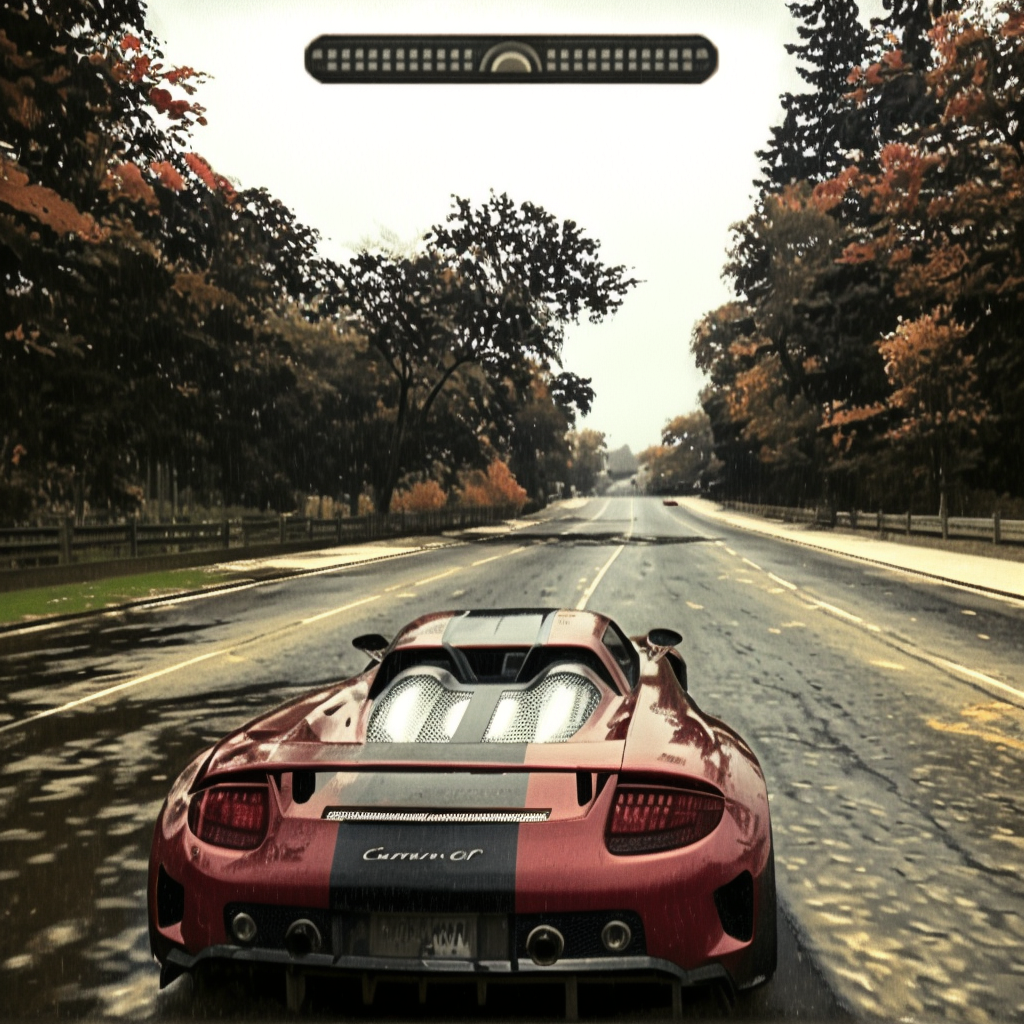

In [70]:
from diffusers import DPMSolverMultistepScheduler, KarrasVeScheduler, DDIMScheduler, LMSDiscreteScheduler, LCMScheduler, DPMSolverSinglestepScheduler, DPMSolverSDEScheduler, PNDMScheduler, DDPMScheduler
import numpy as np 
from torchvision import transforms
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000000.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000100.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000170.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000350.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000400.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000888.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000900.png"
# image_path = "comfyui_sandbox/video_renders/render_nfs_4screens_5_game_render/compressed/nfs_00000912.png"

# image = PIL.Image.open(image_path).convert("RGB")
# image = dataset[170]["input_image"].convert("RGB")
image = dataset[280]["input_image"].convert("RGB")
# image = dataset[190]["input_image"].convert("RGB")
# image = dataset[270]["input_image"].convert("RGB")
# image = dataset[0]["input_image"].convert("RGB")

prompt = "make nfs 2005 photorealistic"
# num_inference_steps = 999
# num_inference_steps = 100
# num_inference_steps = 80
# num_inference_steps = 30
num_inference_steps = 10
# num_inference_steps = 10
# num_inference_steps = 100
# num_inference_steps = 10
image_guidance_scale = 1.5
# image_guidance_scale = 1.0
guidance_scale = 1.0
# guidance_scale = 1.0
# guidance_scale = 1.0

# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config, algorithm_type="sde-dpmsolver++")
# pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)
# pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)
# pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)
# pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config, )
# pipe.scheduler = LCMScheduler.from_config()
# pipe.scheduler = DPMSolverSinglestepScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)
# pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)
# pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
# pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)
# pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config, use_karras_sigmas=True)
pipe.safety_checker = lambda images, clip_input: (images, False)
edited_image = pipe(
    prompt,
    # image=image, 
    image=transforms.CenterCrop(1024)(image), 
    # image= torch.tensor(2*(np.array(image) / 255) - 1).reshape((3, 1080, 1920 )).unsqueeze(0),
    # image= torch.tensor((np.array(image) / 255) - 1).reshape((3, 1080, 1920 )).unsqueeze(0),
    num_inference_steps=num_inference_steps,
    image_guidance_scale=image_guidance_scale,
    guidance_scale=guidance_scale,
    generator=generator,
).images[0]
# edited_image.save("edited_image.png")
edited_image

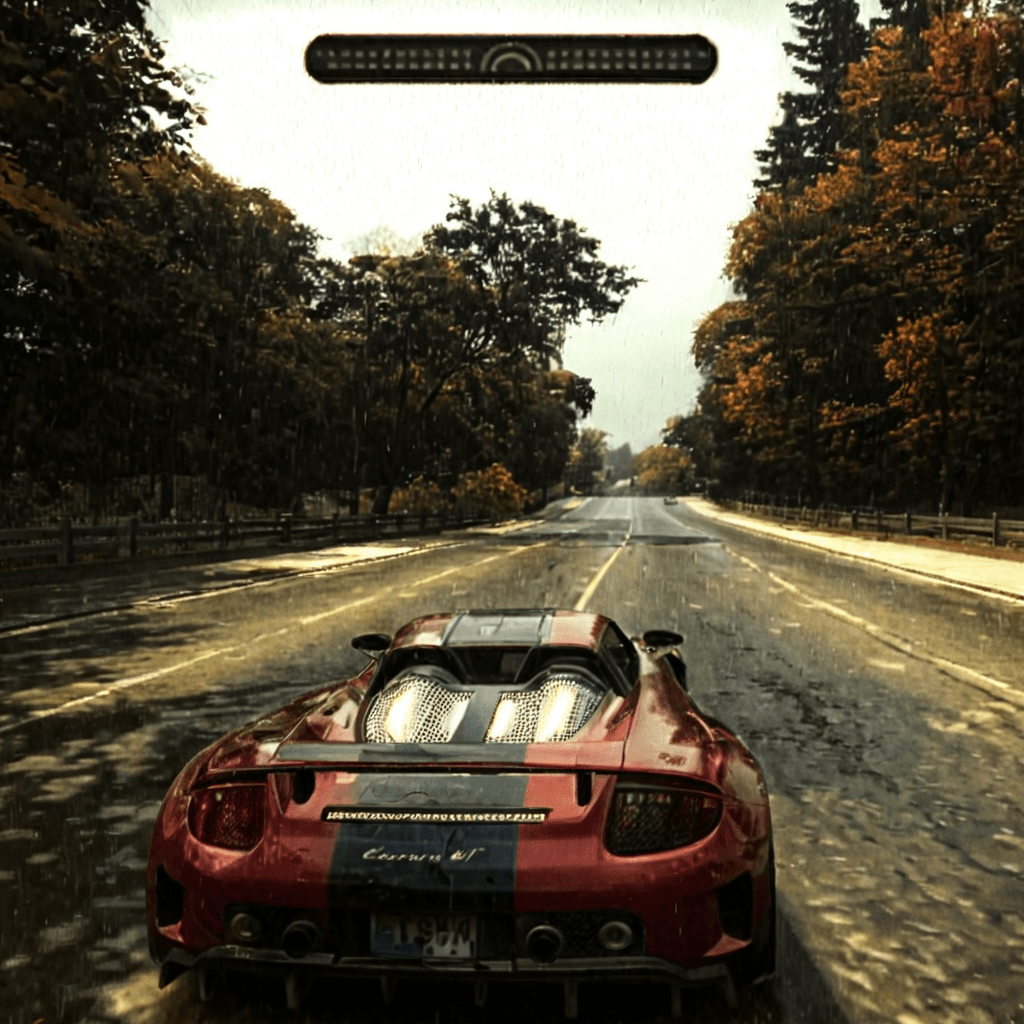

In [57]:
# dataset[280]["edited_image"]
transforms.CenterCrop(1024)(dataset[280]["edited_image"])

### Convert and save model

In [3]:
import os

model_name = "nfs_pix2pix_1735772517"
model_id = f"diffusers/examples/instruct_pix2pix/models/{model_name}"
save_path = "ComfyUI/models/checkpoints/pix2pix"
os.system(
    f"python diffusers/scripts/convert_diffusers_to_original_stable_diffusion.py --model_path diffusers/examples/instruct_pix2pix/models/{model_name} --checkpoint_path {save_path}/{model_name}.safetensors --half --use_safetensors"
)

Renaming decoder.mid.attn_1.to_k.bias to decoder.mid.attn_1.k.bias
Renaming decoder.mid.attn_1.to_k.weight to decoder.mid.attn_1.k.weight
Renaming decoder.mid.attn_1.to_out.0.bias to decoder.mid.attn_1.proj_out.bias
Renaming decoder.mid.attn_1.to_out.0.weight to decoder.mid.attn_1.proj_out.weight
Renaming decoder.mid.attn_1.to_q.bias to decoder.mid.attn_1.q.bias
Renaming decoder.mid.attn_1.to_q.weight to decoder.mid.attn_1.q.weight
Renaming decoder.mid.attn_1.to_v.bias to decoder.mid.attn_1.v.bias
Renaming decoder.mid.attn_1.to_v.weight to decoder.mid.attn_1.v.weight
Renaming encoder.mid.attn_1.to_k.bias to encoder.mid.attn_1.k.bias
Renaming encoder.mid.attn_1.to_k.weight to encoder.mid.attn_1.k.weight
Renaming encoder.mid.attn_1.to_out.0.bias to encoder.mid.attn_1.proj_out.bias
Renaming encoder.mid.attn_1.to_out.0.weight to encoder.mid.attn_1.proj_out.weight
Renaming encoder.mid.attn_1.to_q.bias to encoder.mid.attn_1.q.bias
Renaming encoder.mid.attn_1.to_q.weight to encoder.mid.attn_1

0

### Push to hub

In [7]:
pipe.push_to_hub("dim/nfs_pix2pix_1736384110_step10500")

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/dim/nfs_pix2pix_1736384110_step10500/commit/f21a283cbd01e2d3489a9317b2e85d49c76631df', commit_message='Upload StableDiffusionInstructPix2PixPipeline', commit_description='', oid='f21a283cbd01e2d3489a9317b2e85d49c76631df', pr_url=None, repo_url=RepoUrl('https://huggingface.co/dim/nfs_pix2pix_1736384110_step10500', endpoint='https://huggingface.co', repo_type='model', repo_id='dim/nfs_pix2pix_1736384110_step10500'), pr_revision=None, pr_num=None)

In [21]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers.utils import make_image_grid, load_image

pipeline = StableDiffusionImg2ImgPipeline.from_pretrained(
    "stablediffusionapi/juggernaut-reborn", torch_dtype=torch.bfloat16
)
input_dir = (
    # "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1735772517/checkpoint-1500"
    # "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1736384110/checkpoint-1500"
    "diffusers/examples/instruct_pix2pix/models/nfs_pix2pix_1736384110/checkpoint-4500"
)
pipeline.unet = UNet2DConditionModel.from_pretrained(
    input_dir,
    subfolder="unet",
    torch_dtype=torch.bfloat16,
).to("cuda")
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/user-name-goes-here/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet: Error no file name

In [22]:
# prepare image
init_image = dataset[170]["input_image"].convert("RGB")

prompt = "make nfs 2005 photorealistic"

# pass prompt and image to pipeline
images = pipeline(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
images[0]

  0%|          | 0/37 [00:00<?, ?it/s]

RuntimeError: Given groups=1, weight of size [320, 8, 3, 3], expected input[2, 4, 135, 240] to have 8 channels, but got 4 channels instead